
# Projet math info : équation différentielle

In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [113]:
def solve_euler_explicit(f, x0, dt, n=1000):
    t = [0] ; T = 0
    X = np.copy(x0) ; x = [x0]       
    for i in range (n) :
        X = np.copy(X + dt * f(T, X))
        x.append(X)
        t.append(T)
        T += dt
        
    return t,x 

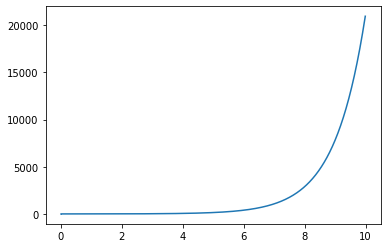

In [114]:
#Test ordre 1 : on résout x_point = x
def h(T, x):
    return x
def tracer_eul(f, x0, dt, n = 1000):
    y=solve_euler_explicit(f, x0, dt) 
    if type(x0) == np.ndarray :
        print("ttt")
        x = [y[1][i][0] for i in range(len(y[1]))]
        plt.plot(y[0], x)
    else :    
        plt.plot(y[0], y[1])
tracer_eul(h, 1.0, 0.01)
#A commenter

ttt


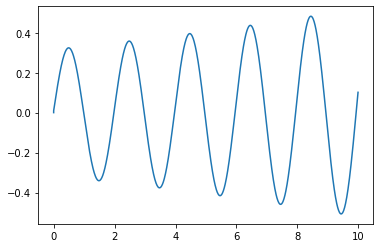

In [118]:
#Test ordte 2 : on résout x_point_point = -W*x

W=10

def g(T, x):
    return np.array([x[1], - W * x[0]])

tracer_eul(g, np.array([0.0, 1.0]), 0.01, 10000)


In [62]:
np.array([0, 1]) + np.array([0, 1])


array([0, 2])